import libraries and read data

In [6]:
#!pip uninstall eodal -y
#!pip install git+https://github.com/lukasValentin/eodal.git@landsat-dev

In [19]:
#import what is needed
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from datetime import datetime
from pathlib import Path
from shapely.geometry import box
from matplotlib import pyplot as plt

from eodal.config import get_settings
from eodal.core.sensors import Landsat
from eodal.core.scene import SceneCollection
from eodal.mapper.feature import Feature

In [8]:
# read data from pickled file object into SceneCollectio
fpath = Path('S:\MSc_23_TimckeFinn\data\EOdal\data_test.pkl')
scoll = SceneCollection.from_pickle(stream=fpath)
scoll

EOdal SceneCollection
----------------------
# Scenes:    1
Timestamps:    2023-05-14 00:00:00
Scene Identifiers:    LC09_L2SP_173060_20230514_20230517_02_T1

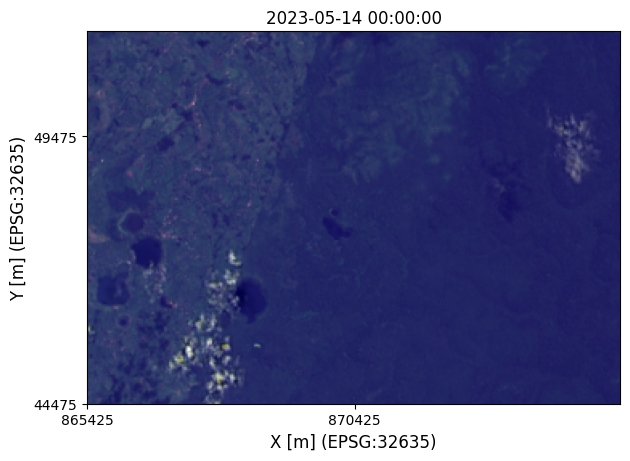

In [45]:
%matplotlib inline  

# the scenes can be plotted
f_scenes = scoll.plot(['red', 'green', 'blue'])

EOdal RasterCollection
----------------------
# Bands:    6
Band names:    blue, green, red, nir08, swir16, swir22
Band aliases:    B2, B3, B4, B5, B6, B7

processed Data (6, 232, 332)


,Band_1,Band_2,Band_3,Band_4,Band_5,Band_6
0,0.08179,0.09346,0.08487,0.24640,0.14035,0.10049
1,0.08115,0.09224,0.08364,0.25529,0.13615,0.09720
2,0.08045,0.09044,0.08288,0.22956,0.12751,0.09370
3,0.07946,0.08956,0.08217,0.20892,0.12106,0.09144
4,0.07858,0.08790,0.08132,0.19320,0.11864,0.09042
...,...,...,...,...,...,...
77019,0.07706,0.08274,0.07807,0.17341,0.11250,0.08752
77020,0.07704,0.08239,0.07797,0.17548,0.11236,0.08755
77021,0.07711,0.08233,0.07788,0.17321,0.11151,0.08681
77022,0.07735,0.08281,0.07833,0.17373,0.11276,0.08724


C:\Users\finnt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(77024,)
(232, 332)


,Band_1,Band_2,Band_3,Band_4,Band_5,Band_6,Cluster
0,0.08179,0.09346,0.08487,0.24640,0.14035,0.10049,3
1,0.08115,0.09224,0.08364,0.25529,0.13615,0.09720,3
2,0.08045,0.09044,0.08288,0.22956,0.12751,0.09370,3
3,0.07946,0.08956,0.08217,0.20892,0.12106,0.09144,7
4,0.07858,0.08790,0.08132,0.19320,0.11864,0.09042,0
...,...,...,...,...,...,...,...
77019,0.07706,0.08274,0.07807,0.17341,0.11250,0.08752,6
77020,0.07704,0.08239,0.07797,0.17548,0.11236,0.08755,6
77021,0.07711,0.08233,0.07788,0.17321,0.11151,0.08681,6
77022,0.07735,0.08281,0.07833,0.17373,0.11276,0.08724,6


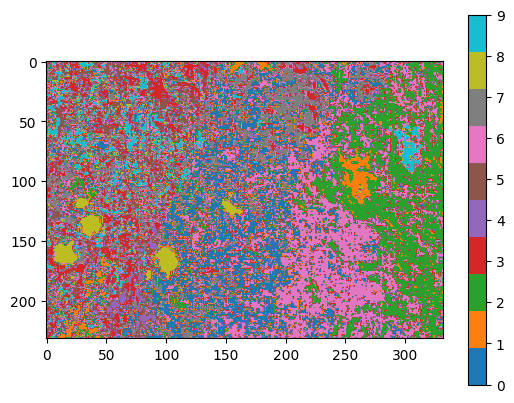

In [39]:
# see which bands are available
for scene_id, scene in scoll:
    
    print(scene)
    
    # Reshape the raster data to have the shape (pixels, bands)
    raster_data = scene.get_values()
 
    # Extract the first 6 bands
    selected_bands = raster_data[:, :, :]

    # Reshape the selected bands to have the shape (pixels, bands)
    bands, rows, columns = selected_bands.shape
    reshaped_data = selected_bands.reshape((bands, rows * columns)).T

    # Create a DataFrame from the reshaped data
    df = pd.DataFrame(reshaped_data, columns=[f'Band_{i+1}' for i in range(bands)])

    # Print the DataFrame
    print()
    print("processed Data", raster_data.shape)
    display(df)
    
    # Create a KMeans instance
    kmeans = KMeans(n_clusters=10)  # Set the desired number of clusters

    # Fit the KMeans model to the data
    kmeans.fit(reshaped_data)

    # Get the cluster labels
    labels = kmeans.labels_
    print(labels.shape)

    # Add the cluster labels to the DataFrame
    df['Cluster'] = labels

    # Reshape the labels back to the original shape of raster_data
    labels_reshaped = labels.reshape((rows, columns))
    print(labels_reshaped.shape)

    display(df)




# Plot the labels using plt.imshow
plt.imshow(labels_reshaped, cmap='tab10')  # Adjust the colormap as desired
plt.colorbar()
plt.show()